#### **Exercise 1:**

A couple of weeks ago, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

In [102]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(1309, 11)

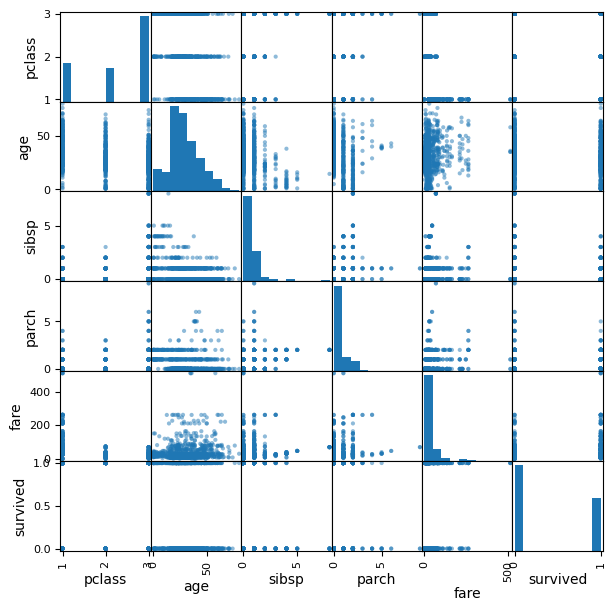

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [103]:
titanic_df = pd.read_csv("/workspaces/student-lecture-materials-jlin119/5-week5/data/titanic.csv")

#titanic_df.isnull().sum() #age = 263, cabin = 1014
display(titanic_df.shape)

pd.plotting.scatter_matrix(titanic_df, figsize = (7,7))
plt.show() # hides the extra array information

display(titanic_df.head())

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

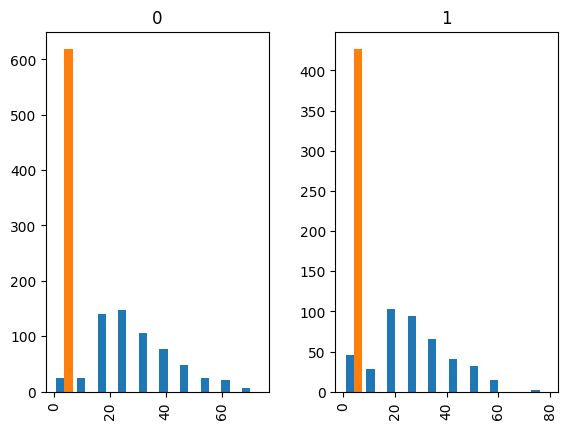

In [104]:
titanic_df[['age', 'survived']].hist(by = 'survived')
# survived and age have a relationship, so would be useful to impute the null ages

In [105]:
# drop irrevelevant columns
titanic_clean = titanic_df.drop(columns = ['name', 'cabin', 'ticket', 'fare'], axis = 1)
titanic_clean.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,female,29.0000,0,0,S,1
1,1,male,0.9167,1,2,S,1
2,1,female,2.0000,1,2,S,0
3,1,male,30.0000,1,2,S,0
4,1,female,25.0000,1,2,S,0


pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
survived    0
dtype: int64

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,female,29.0000,0,0,S,1
1,1,male,0.9167,1,2,S,1
2,1,female,2.0000,1,2,S,0
3,1,male,30.0000,1,2,S,0
4,1,female,25.0000,1,2,S,0


array([[<Axes: title={'center': 'age'}>]], dtype=object)

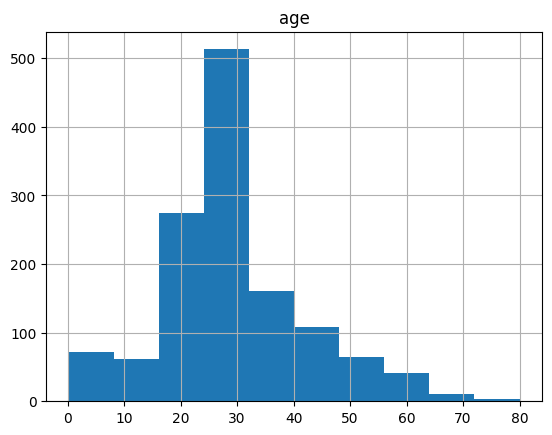

In [106]:
# select imputation method
imputer = SimpleImputer(strategy = "median")

titanic_clean['age'] = imputer.fit_transform(titanic_clean[['age']])
display(titanic_clean.isnull().sum())
display(titanic_clean.head())

titanic_clean[['age']].hist()
# now has a central tendency because added a lot of median values

In [107]:
imputer2 = SimpleImputer(strategy = "most_frequent")
titanic_clean['embarked'] = imputer2.fit_transform(titanic_clean[['embarked']])

#titanic_clean[['embarked']].hist()

ValueError: 2

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [87]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   embarked  1307 non-null   object 
 6   survived  1309 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [88]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = "first", sparse_output = False)
# co-linearity, so able to drop one of the columns
# sparse matrix only records indicies of ones, but to make it useful False
titanic_clean['sex'] = encoder.fit_transform(titanic_clean[['sex']])

titanic_clean.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,1,0.0,29.0000,0,0,S,1
1,1,1.0,0.9167,1,2,S,1
2,1,0.0,2.0000,1,2,S,0
3,1,1.0,30.0000,1,2,S,0
4,1,0.0,25.0000,1,2,S,0


In [89]:
encoder2 = OneHotEncoder(drop = "first", sparse_output = False)

X = encoder2.fit_transform(titanic_clean[['embarked']])
titanic_clean[encoder2.get_feature_names_out()] = X
titanic_clean = titanic_clean.drop('embarked', axis = 1)
titanic_clean.head()

,pclass,sex,age,sibsp,parch,survived,embarked_Q,embarked_S,embarked_nan
0,1,0.0,29.0000,0,0,1,0.0,1.0,0.0
1,1,1.0,0.9167,1,2,1,0.0,1.0,0.0
2,1,0.0,2.0000,1,2,0,0.0,1.0,0.0
3,1,1.0,30.0000,1,2,0,0.0,1.0,0.0
4,1,0.0,25.0000,1,2,0,0.0,1.0,0.0


#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression()
X = titanic_clean.drop('survived', axis = 1) # X are the values that we're using in dataframe
y = titanic_clean['survived'] # y is target data in vector
result = cross_val_score(model, X = X, y = y, cv = 5)
result
#np.mean(result)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.53816794, 0.85114504, 0.81679389, 0.72519084, 0.67049808])

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [98]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth = 3)
result2 = cross_val_score(model2, X = X, y = y, cv = 5)
result2 # ratio of correct predictions
#np.mean(result2)

array([0.51526718, 0.84351145, 0.60687023, 0.70992366, 0.63601533])